# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

**ΕΡΩΤΗΜΑ 1**

# Load Dataset

In [ ]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Plot Variables

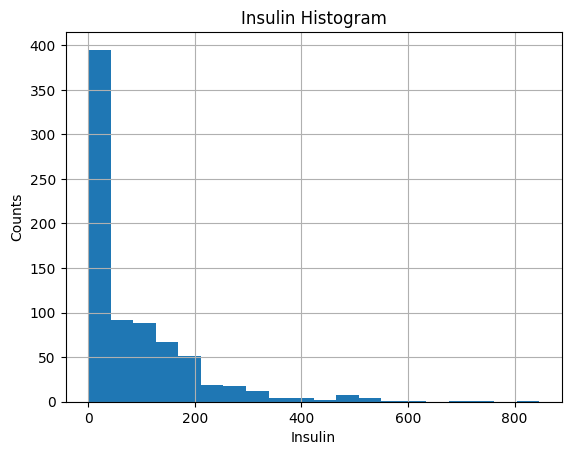

In [ ]:
df['Insulin'].hist(bins=20)
plt.title('Insulin Histogram')
plt.xlabel('Insulin')
plt.ylabel('Counts')
plt.show()

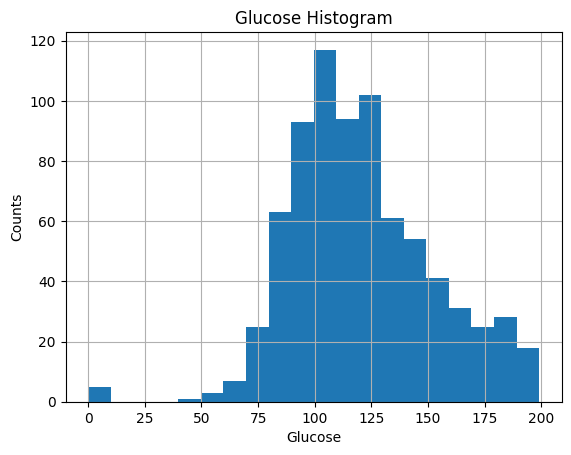

In [ ]:
df['Glucose'].hist(bins=20)
plt.title('Glucose Histogram')
plt.xlabel('Glucose')
plt.ylabel('Counts')
plt.show()

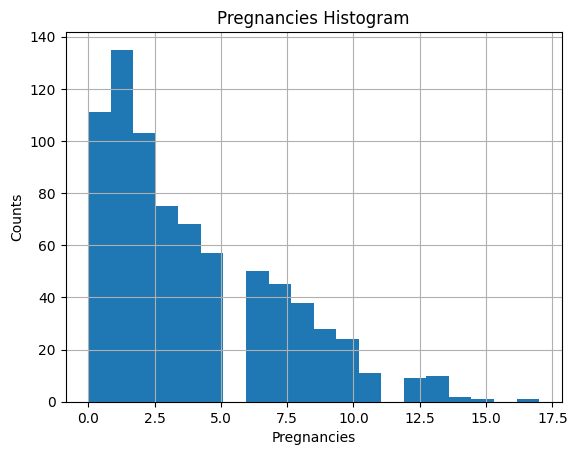

In [ ]:
df['Pregnancies'].hist(bins=20)
plt.title('Pregnancies Histogram')
plt.xlabel('Pregnancies')
plt.ylabel('Counts')
plt.show()

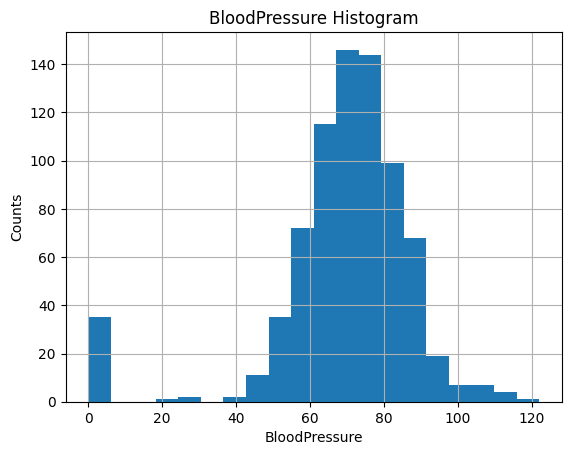

In [ ]:
df['BloodPressure'].hist(bins=20)
plt.title('BloodPressure Histogram')
plt.xlabel('BloodPressure')
plt.ylabel('Counts')
plt.show()

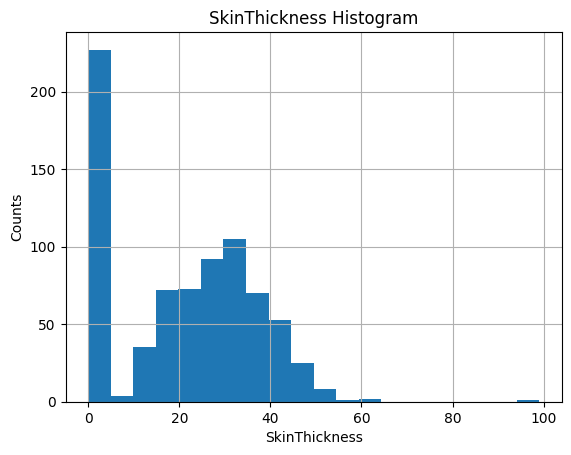

In [ ]:
df['SkinThickness'].hist(bins=20)
plt.title('SkinThickness Histogram')
plt.xlabel('SkinThickness')
plt.ylabel('Counts')
plt.show()

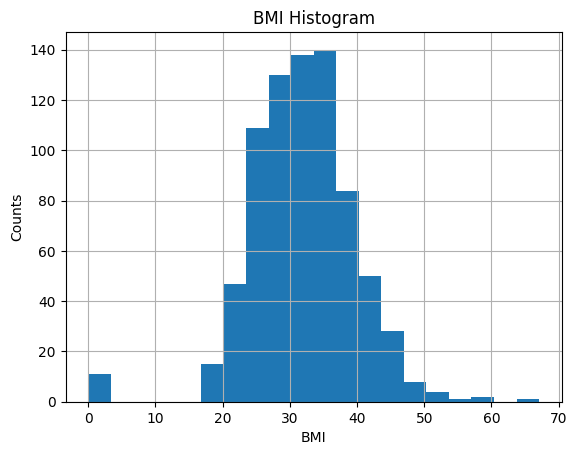

In [ ]:
df['BMI'].hist(bins=20)
plt.title('BMI Histogram')
plt.xlabel('BMI')
plt.ylabel('Counts')
plt.show()

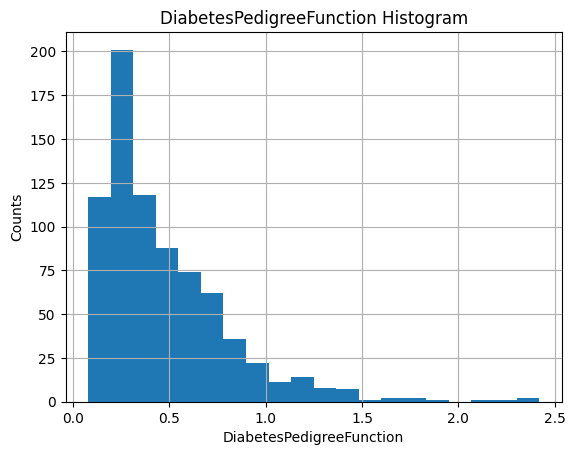

In [ ]:
df['DiabetesPedigreeFunction'].hist(bins=20)
plt.title('DiabetesPedigreeFunction Histogram')
plt.xlabel('DiabetesPedigreeFunction')
plt.ylabel('Counts')
plt.show()

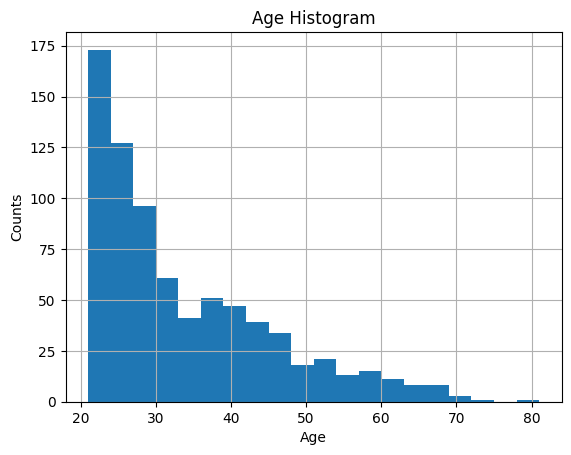

In [ ]:
df['Age'].hist(bins=20)
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.show()

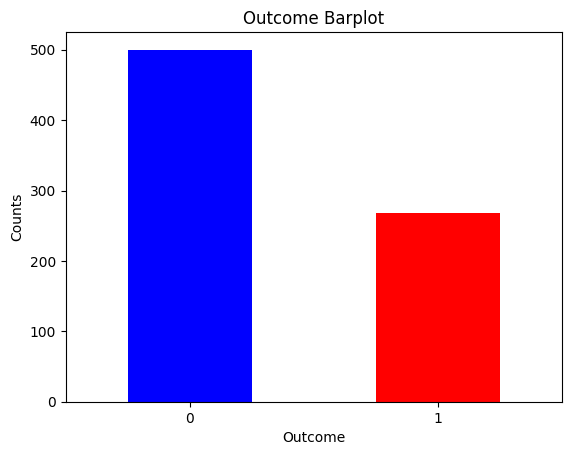

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title("Outcome Barplot")
plt.xlabel("Outcome")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

**ΕΡΩΤΗΜΑ 2**

Η ποιότητα των δεδομένων δεν είναι πολύ καλή και αυτό γιατί τα δεδομένα παρουσιάζουν κάποιες ελλείψεις. Μία από αυτές τις ελλείψεις είναι οι μηδενικές τιμές που εμφανίζονται σε μεταβλητές όπως είναι ο δείκτης μάζας σώματος ή η αρτηριακή πίεση. Όπως είναι λογικό, αυτές οι τιμές δεν είναι δυνατόν να είναι μηδενικές, ωστόσο η εμφάνιση μηδενικών τιμών υποδηλώνει ότι στα δεδομένα μας μπορεί να έχουμε "missing data", δηλαδή δεδομένα που λείπουν γιατί μπορεί να μην έχει γίνει καταγρφή αυτών των τιμών σε αυτούς τους ασθενείς ή να έχει γίνει κάποιο λάθος κατα την καταγρφή. Ένα ακόμα παράδειγμα που υποδηλώνει οτι η ποιότητα των δεδομένων δεν είναι καλή είναι η ύπαρξη ακραίων τιμών στη μεταβλητή της ινσουλίνης. Παρατηρούμε ότι η συγκεκριμένη μεταβλητή έχει μεγάλη τυπική απόκλιση και ακραίες τιμές που δεν ανταποκρύνονται στην πραγματικότητα.

**ΕΡΩΤΗΜΑ 3**

Η μεταβλητή Age ακολουθεί την δεξιά ασσύμετρη κατανομή και αυτό σημαίνει ότι οι περισσότερες τιμές αυτής της μεταβλητής να βρίσκονται στα αριστερά και στα συγκεκριμένα δεδομένα στις ηλικίες 20-30, ενώ η ουρά τις κατανομής όπου βρισκονται και οι λιγότερες παρατηρήσεις εκτείνεται προς τα δεξιά. Αυτό δείχνει ότι η μεταβλητή αυτή δεν είναι ιδανική για την κατασκευή ενός μοντέλου πρόβλεψης διότι ενδέχεται να μαθαίνει και να κάνει καλές προβλέψεις στις μικρότερες ηλικίες καθώς έχει πολλά δεδομένα για να εκπαιδευτεί αλλά ταυτόχρονα να μην κάνει καλή κατηγοριοποίηση στους ασθενείς μεγαλύτερης ηλικίας καθώς δεν υπάρχουν αρκετά δεδομένα.

**ΕΡΩΤΗΜΑ 4**

In [ ]:
df.groupby('Outcome')['Glucose'].mean()

,Glucose
Outcome,
0,109.980000
1,141.257463


Αν πάρουμε τη μέση τιμή της μεταβλητής γλυκόζης ανάμεσα σε διαβητικούς και μη διαβητικούς, μπορούμε να διαπιστώσουμε ότι η μέση τιμή της μεταβλητής γλυκόζης είναι αρκετά μεγαλύτερη για τους ασθενείς μη διαβήτη σε σχέση με αυτούς που δεν έχουν.

**ΕΡΩΤΗΜΑ 5**

# Convert DataFrame to Numpy arrays

In [ ]:
input_df = df.drop(columns=['Outcome'])
targets_df = df['Outcome']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((768, 8), (768,))

# Split Dataset to Train-Test

Train Samples: 691
Test Samples: 77

In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

**ΕΡΩΤΗΜΑ 6**

# Create a Logistic Regression Model

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=seed)

# Train model on training set

In [ ]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

# Evaluate Model on test set

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
train_pred = model.predict(x_train)
train_pred

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
accuracy = accuracy_score(y_train, train_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 76.54


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = round(accuracy*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage}')

The accuracy of the model is: 77.92


Δεν υπάρχει αισθητή διαφορά στην ακρίβεια μεταξύ train set και test set αυτό σημαίνει ότι το μοντέλο κάνει καλή γενίκευση και δεν υπερπροσαρμόζεται στα δεδομένα εκπαίδευσης.

**ΕΡΩΤΗΜΑ 7**

In [ ]:
mask_0_25 = x_test[:, 7] < 25

x_test_0_25 = x_test[mask_0_25]
y_test_0_25 = y_test[mask_0_25]
y_pred_0_25 = model.predict(x_test_0_25)

accuracy_0_25 = accuracy_score(y_test_0_25, y_pred_0_25)
accuracy_percentage_0_25 = round(accuracy_0_25*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage_0_25}')

The accuracy of the model is: 83.78


In [ ]:
mask_25_50 = (x_test[:, 7] >= 25)&(x_test[:, 7] <= 50)

x_test_25_50 = x_test[mask_25_50]
y_test_25_50 = y_test[mask_25_50]
y_pred_25_50 = model.predict(x_test_25_50)

accuracy_25_50 = accuracy_score(y_test_25_50, y_pred_25_50)
accuracy_percentage_25_50 = round(accuracy_25_50*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage_25_50}')

The accuracy of the model is: 72.79


In [ ]:
mask_50 = x_test[:, 7] > 50

x_test_50 = x_test[mask_50]
y_test_50 = y_test[mask_50]
y_pred_50 = model.predict(x_test_50)

accuracy_50 = accuracy_score(y_test_50, y_pred_50)
accuracy_percentage_50 = round(accuracy_50*100, 2)

print(f'The accuracy of the model is: {accuracy_percentage_50}')

The accuracy of the model is: 90.48


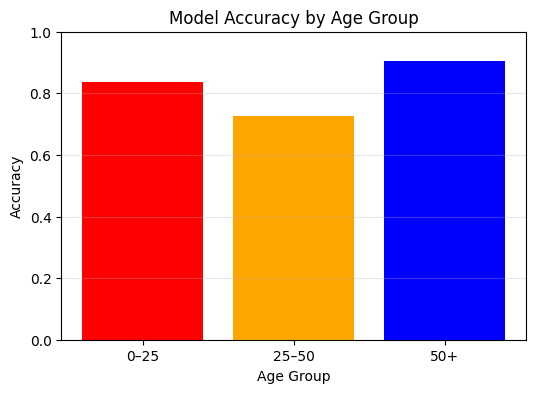

In [ ]:
age_groups = ['0–25', '25–50', '50+']
accuracies = [accuracy_0_25, accuracy_25_50, accuracy_50]

plt.figure(figsize=(6,4))
bars = plt.bar(age_groups, accuracies, color=['red', 'orange', 'blue'])
plt.title('Model Accuracy by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

Παρατηρούμε ότι το μοντέλο δουλεύει καλά και στις τρεις ηλικιακές ομάδες.

**ΕΡΩΤΗΜΑ 8**

Το χειρότερο σφάλμα είναι να προβλέπει ο ταξινομητής ότι ένας ασθενής δεν έχει διαβήτη ενώ στην πραγματικότητα έχει. Σε τέτοιες περιπτώσεις ο ασθενής μπορεί να οδηγηθεί σε καθυστέρηση διάγνωσης και θεραπείας με αποτέλεσμα να έχει σοβαρές συνέπειες η υγεία του. Αντίθετα, το να προβλέψει ότι κάποιος έχει διαβήτη χωρίς να έχει είναι λιγότερο επικίνδυνο, καθώς αυτό μετά μπορεί να επιλυθεί πραγματοποιώντας περαιτέρω εξετάσεις.

**ΕΡΩΤΗΜΑ 9**

In [ ]:
seeds = range(10)
accuracies = []
accuracies_train = []

for seed in seeds:
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=seed)

    model = LogisticRegression(max_iter=1000, random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracies.append(accuracy)
    accuracies_train.append(accuracy_train)

In [ ]:
mean_acc = np.mean(accuracies)
mean_acc = round(mean_acc*100, 2)
mean_acc_train = np.mean(accuracies_train)
mean_acc_train = round(mean_acc_train*100, 2)
std_acc = np.std(accuracies)

print(f'The mean accuracy of the model is: {mean_acc}')
print(f'The mean accuracy of the model in train set is: {mean_acc_train}')
print(f'The mean std of the model is: {std_acc}')

The mean accuracy of the model is: 77.27
The mean accuracy of the model in train set is: 77.65
The mean std of the model is: 0.018695084746051253


**ΕΡΩΤΗΜΑ 10**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
x_2 = df.drop('Outcome', axis=1)
y_2 = df['Outcome']

In [ ]:
scaler = MinMaxScaler()
x_2 = scaler.fit_transform(x_2)

In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x_2, y_2, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

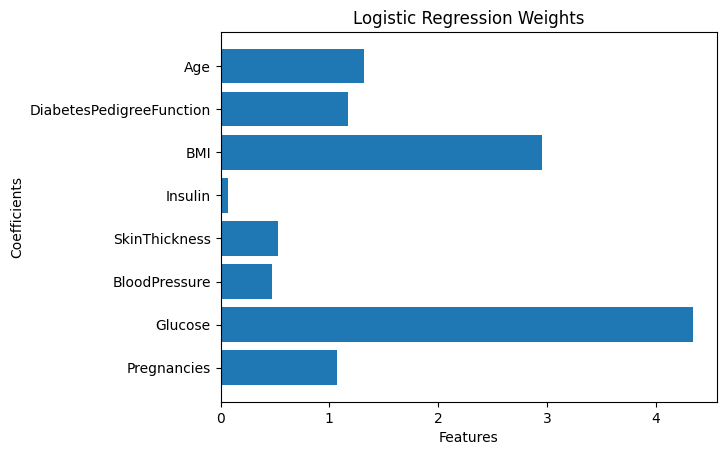

In [ ]:
coeffs = model.coef_[0]
importance_weights = np.abs(coeffs)
plt.barh(input_df.columns, importance_weights)
plt.title('Logistic Regression Weights')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()

Παρατηρούμε ότι οι 3 πιο σημαντικοί παράγοντες που επηρεάζουν την πρόβλεψη του διαβήτη είναι η γλυκόζης, ο δείκτης μάζας σώματος και η ηλικία. Αυτό προκύπτει από τις τιμές των συντελεστών του μοντέλου, δηλαδή όσο μεγαλύτερη είναι η απόλυτη τιμή ενός συντελεστή, τόσο ισχυρότερη είναι η επίδραση του αντίστοιχου χαρακτηριστικού στην τελική πρόβλεψη. Οι μεταβλητές με τα μεγαλύτερα βάρη συμβάλλουν περισσότερο στον καθορισμό της πιθανότητας εμφάνισης διαβήτη.

**ΜΕΡΟΣ 2**

**ΕΡΩΤΗΜΑ 1**

In [ ]:
df_2 = pd.read_csv("diabetes.csv")

x = df[['Pregnancies', 'BloodPressure', 'BMI', 'Age']]
y = df['Glucose']
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
seed = 0
test_size = 0.3

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 4), (537,), (231, 4), (231,))

**ΕΡΩΤΗΜΑ 2**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 929.8883492746899
Mean Absolute Error (MAE): 23.599990462075155


Το μέσο τετραγωνικό σφάλμα MSE επηρεάζεται από τις ακραίες τιμές των παρατηρήσεων καθώς η διαφορά υψώνεται σττο τετράγωνο, ενώ το μέσο απόλυτο σφάλμα παίρνει την απόλυτη τιμή τις διαφοράς της προβλεπόμενης τιμής από την πραγματική. Άρα με βάση τα δεδομένα, παρότι και τα δύο σφάλματα ανταποκρύνονται καλά, η επιλογή του MSE μπορεί να θεωρηθεί καλύτερη καθώς διαφοροποιείται περισσότερο.

**ΕΡΩΤΗΜΑ 3**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alphas = [0.2, 0.4, 0.6, 0.8, 1.0]
results = []

for alpha in alphas:
    model = Lasso(alpha=alpha, random_state=0, max_iter=10000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results.append((alpha, mae, mse))

results_df = pd.DataFrame(results, columns=['Alpha', 'MAE', 'MSE'])
print(results_df)

   Alpha        MAE         MSE
0    0.2  23.594203  929.715925
1    0.4  23.588415  929.555701
2    0.6  23.582629  929.407728
3    0.8  23.576843  929.271958
4    1.0  23.571058  929.148391


**ΕΡΩΤΗΜΑ 4**

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
coeffs = model.coef_
importance_weights = np.abs(coeffs)
importance_weights

array([0.16819275, 0.04080984, 0.9420789 , 0.76837932])

In [ ]:
x = df[['Pregnancies', 'BMI', 'Age']]
y = df['Glucose']
x = x.to_numpy()
y = y.to_numpy()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((537, 3), (537,), (231, 3), (231,))

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 932.1503886864976
Mean Absolute Error (MAE): 23.615563643141343


Η αφαίρεση του BloodPressure δεν άλλαξε σημαντικά την ακρίβεια, κάτι που επιβεβαιώνει ότι το χαρακτηριστικό αυτό έχει μικρή επιρροή στην πρόβλεψη.